In [ ]:
import pandas as pf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import yfinance as yf
import pandas_datareader.data as web

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


# For the simulated Data

In [ ]:
def Black_Scholes(S, K, T, r, sigma, option_type = 'call'):

  y_1 = (np.log(S/K)+T*(r+(sigma**2/2)))/(sigma*np.sqrt(T))
  y_2 = (np.log(S/K)+T*(r-(sigma**2/2)))/(sigma*np.sqrt(T))

  if option_type == 'call':
    option_price = S*stats.norm.cdf(y_1) - K*np.exp(-r*T)*stats.norm.cdf(y_2)
  elif option_type == 'put':
    option_price = K*np.exp(-r*T)*stats.norm.cdf(-y_2) - S*stats.norm.cdf(-y_1)
  else:
    return "Invalid Option Type"

  return round(option_price,2)

In [ ]:
S = 100     # Current stock price
K = 110    # Strike price
T = (6/12)    # Time to expiration (in years)
r = 0.1     # Risk-free interest rate
sigma = 0.2  # Volatility

print("C^E(0) = ", Black_Scholes(S, K, T, r, sigma, option_type='call'))
print("P^E(0) = ", Black_Scholes(S, K, T, r, sigma, option_type='put'))

C^E(0) =  3.74
P^E(0) =  8.38


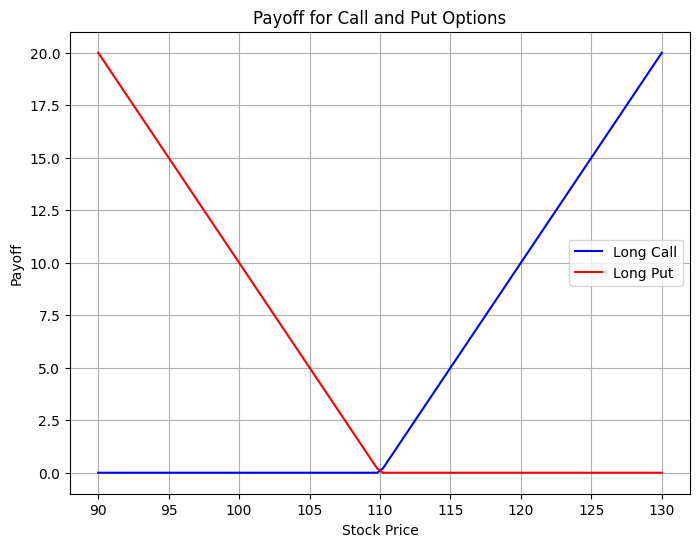

In [ ]:
# Defined parameters
stock_price_range = np.linspace(90, 130, 100)
call_payoff = np.maximum(stock_price_range - 110, 0)
put_payoff = np.maximum(110 - stock_price_range, 0)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(stock_price_range, call_payoff, label='Long Call', color='blue')
plt.plot(stock_price_range, put_payoff, label='Long Put', color='red')
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title('Payoff for Call and Put Options')
plt.legend()
plt.grid(True)
plt.show()


# For real Data

In [ ]:
# Retrieve historical price data
ticker = 'GOOGL'
start_date = '2013-02-18'
end_date = '2023-02-18' #using a 10 year range
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
stock_data['Returns'] = np.log(stock_data['Close'] / stock_data['Close'].shift(1))

# Calculate volatility
volatility = stock_data['Returns'].std() * np.sqrt(252)  # Assuming 252 trading days in a year
print('\n Annual Volatility:', volatility)

[*********************100%%**********************]  1 of 1 completed


 Annual Volatility: 0.2734465712612784


In [ ]:
#Getting todays stock price
stock = yf.Ticker(ticker)
current_price = stock.history(period='1d')['Close'].iloc[-1]

print('Current Stock Price of', ticker, ':', round(current_price,2))

Current Stock Price of GOOGL : 140.52


In [ ]:
#fred - Federal Reserve Economic Data
#DSG1 - 1 Year Treasury rate
risk_free_rate = web.DataReader('DGS1', 'fred')  # 1-Year Treasury Constant Maturity Rate
current_risk_free_rate = risk_free_rate.iloc[-1]['DGS1'] / 100  # Convert percentage to decimal

print('Current Risk-Free Interest Rate:', current_risk_free_rate)


Current Risk-Free Interest Rate: 0.0493


In [ ]:
S = current_price     # Current stock price
K = current_price    # Strike price
T = 1    # Time to expiration (in years)
r = current_risk_free_rate     # Risk-free interest rate
sigma = volatility  # Volatility

print("C^E(0) = ", Black_Scholes(S, K, T, r, sigma, option_type='call'))
print("P^E(0) = ", Black_Scholes(S, K, T, r, sigma, option_type='put'))

C^E(0) =  18.53
P^E(0) =  11.77


# Hedging Delta

In [ ]:
def Call_Delta_Hedging(S, K, T, r, sigma, option_quantity):
    #Finding Delta
    y_1 = (np.log(S/K)+T*(r+(sigma**2/2)))/(sigma*np.sqrt(T))
    delta = stats.norm.cdf(y_1)

    # Hedge ratio
    hedge_ratio = delta * option_quantity

    CE =  Black_Scholes(S, K, T, r, sigma, option_type='call')

    #Values for portfolio
    z = option_quantity
    x = -hedge_ratio
    y = -x*S-z*CE

    portfolio = (x,y,z)
    return portfolio

In [ ]:
S = 100     # Current stock price
K = 110    # Strike price
T = (6/12)    # Time to expiration (in years)
r = 0.1     # Risk-free interest rate
sigma = 0.2  # Volatility

# Option parameters
option_quantity = -1000  # Short (sell) 1000 call options

port = Call_Delta_Hedging(S, K, T, r, sigma, option_quantity)
print(port, "\n")
print(port[0]*S + port[1] + port[2]*Black_Scholes(S, K, T, r, sigma, option_type='call'))

(401.41715171302985, -36401.71517130299, -1000) 

0.0
